Columns in the DataFrame: Index(['TEAM', 'GP', 'W', 'NetRtg', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')


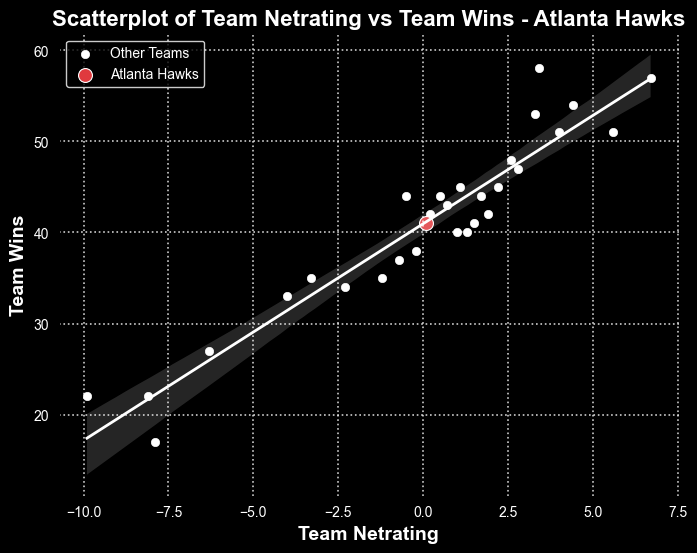

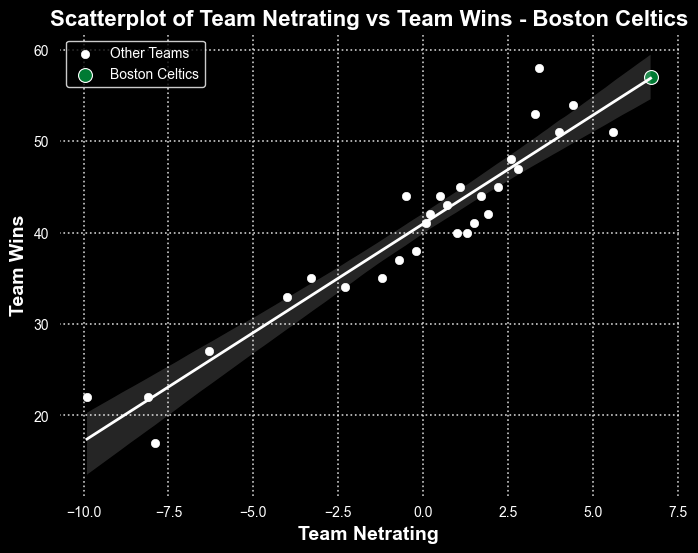

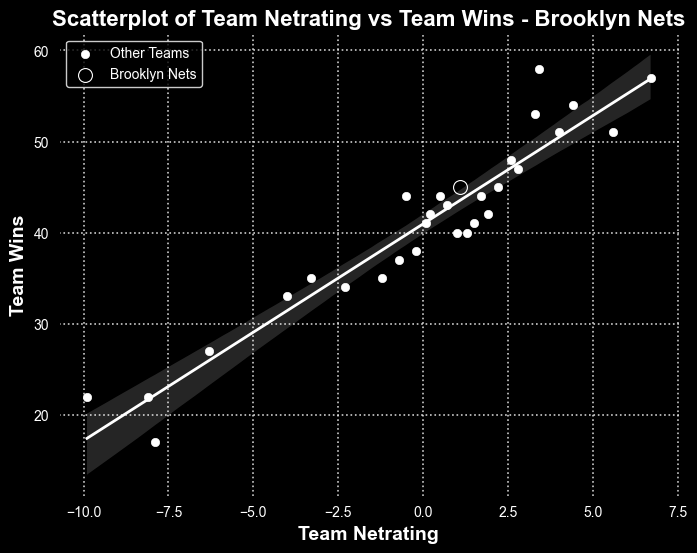

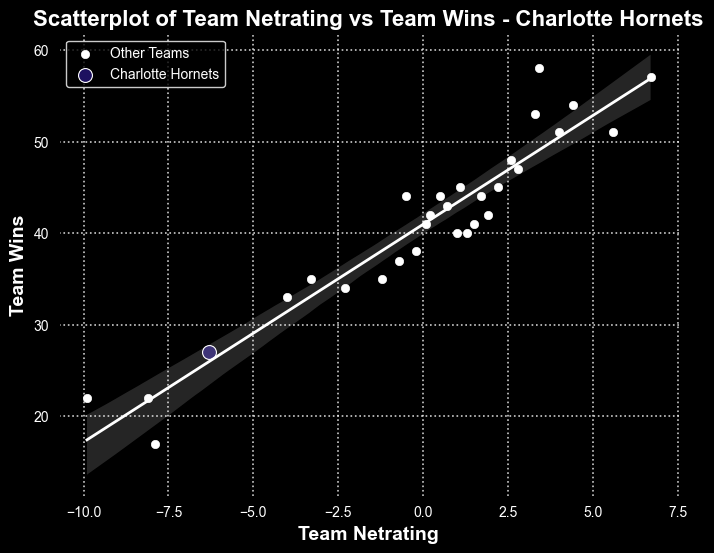

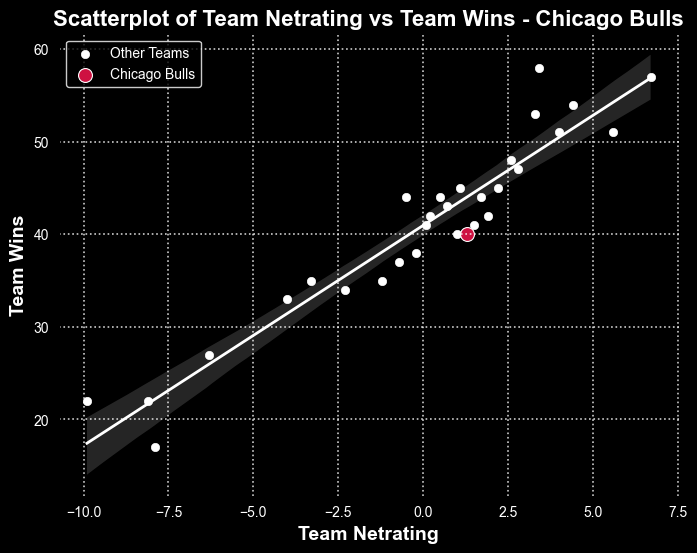

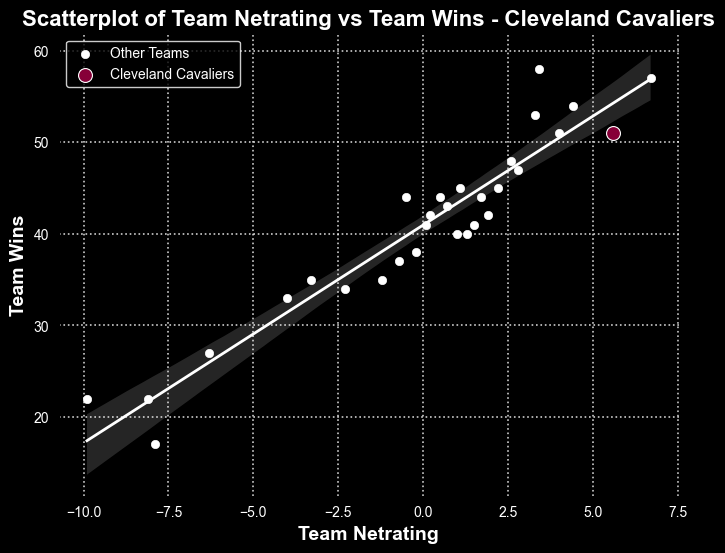

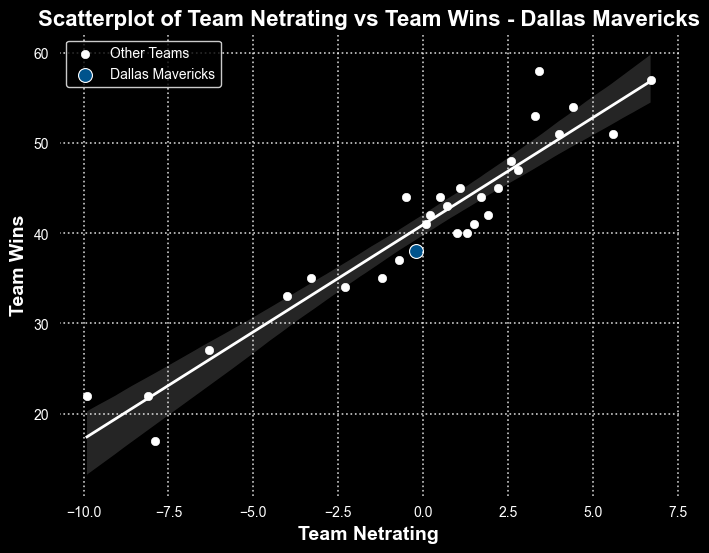

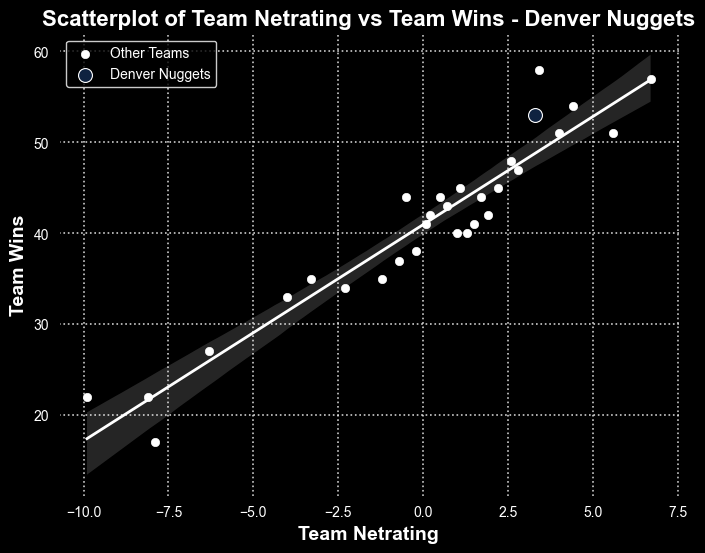

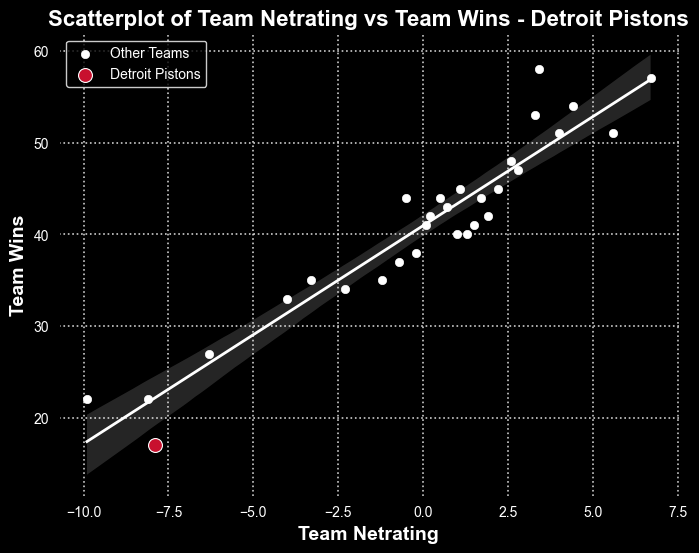

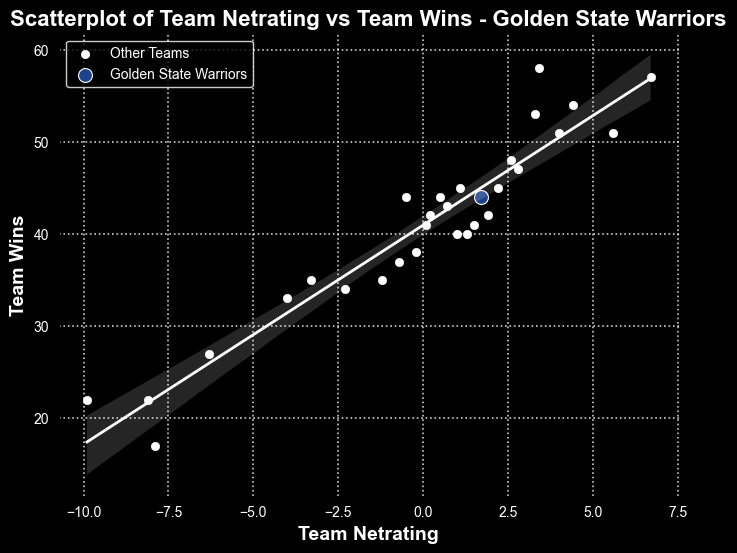

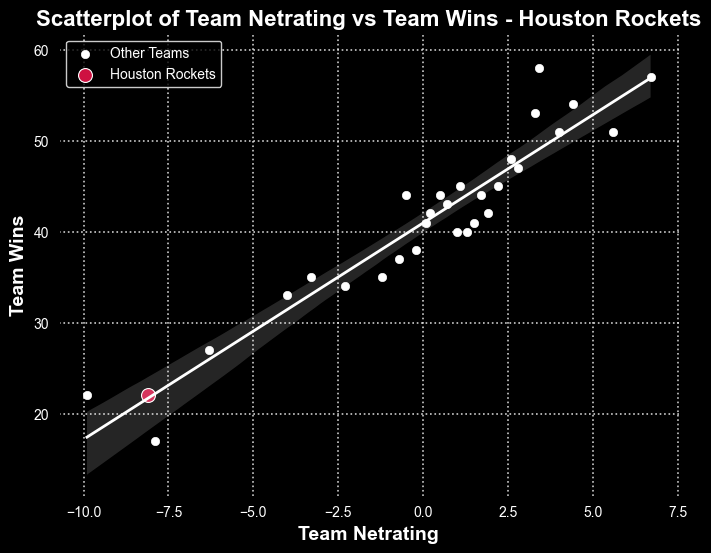

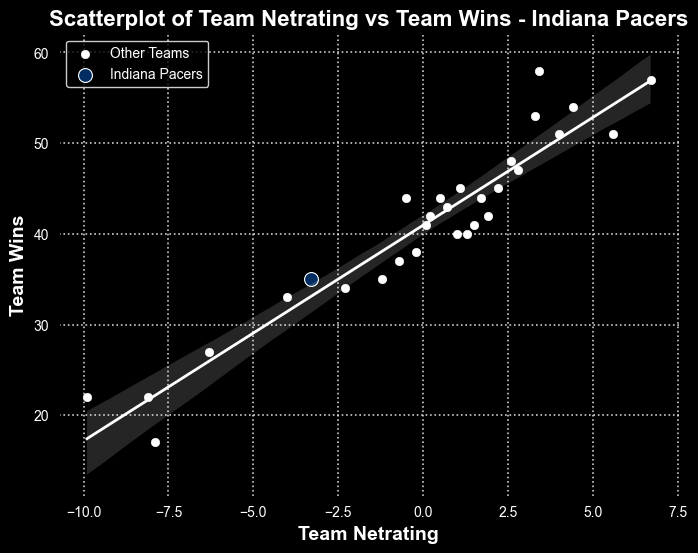

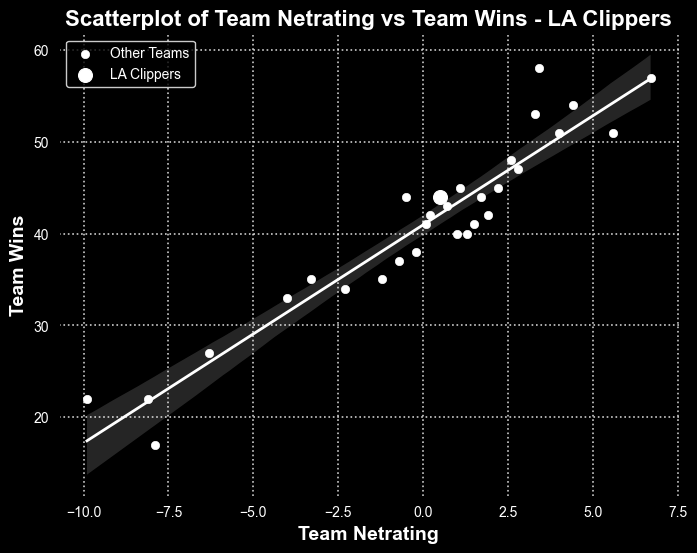

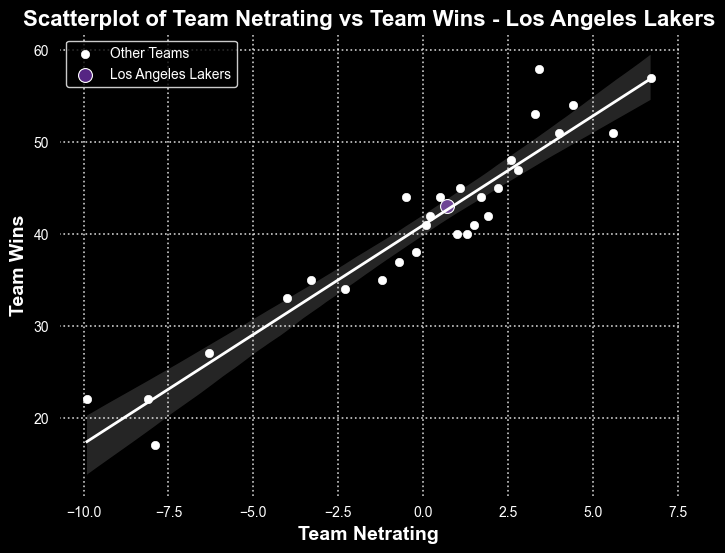

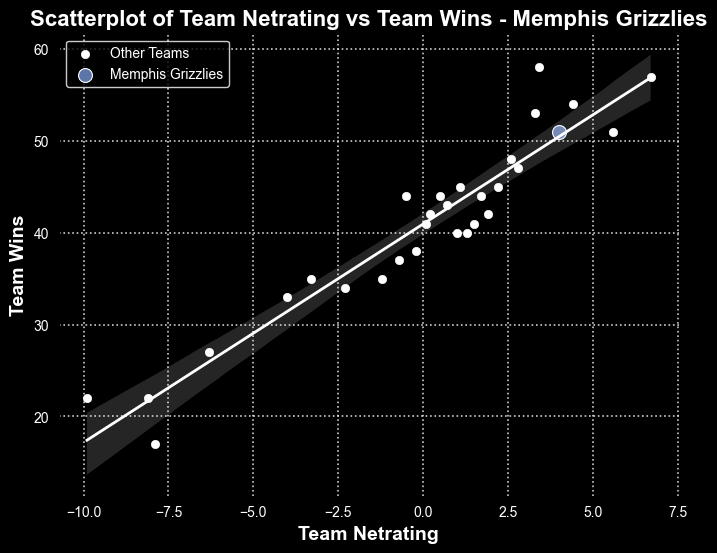

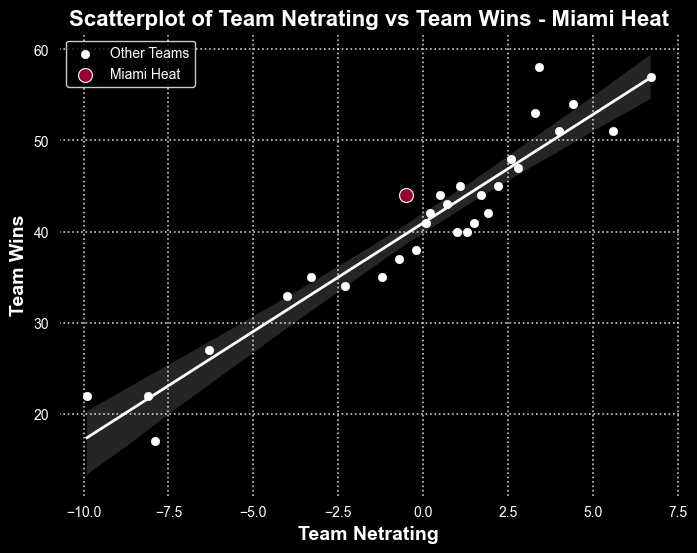

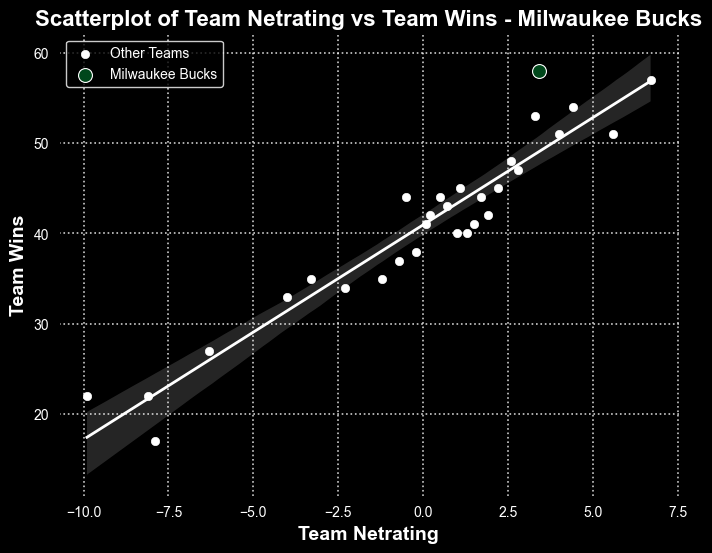

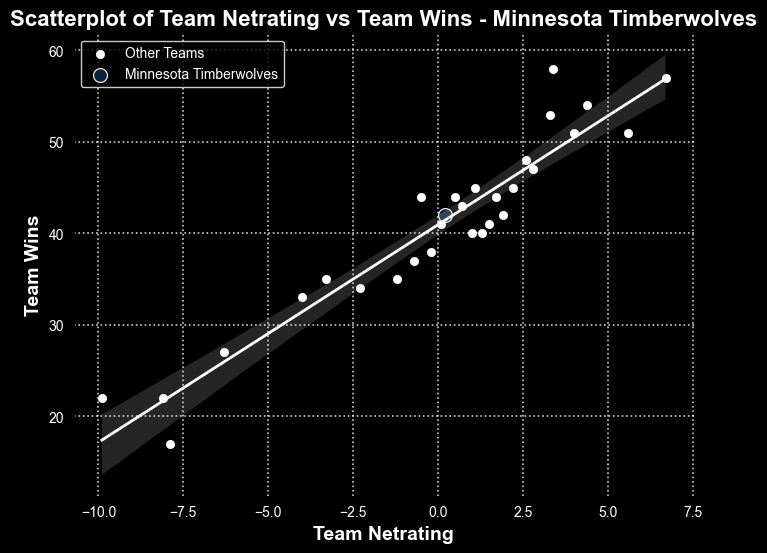

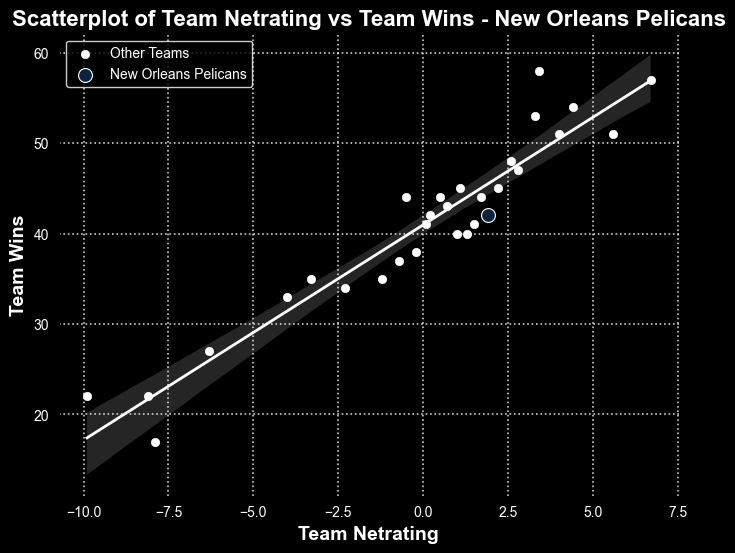

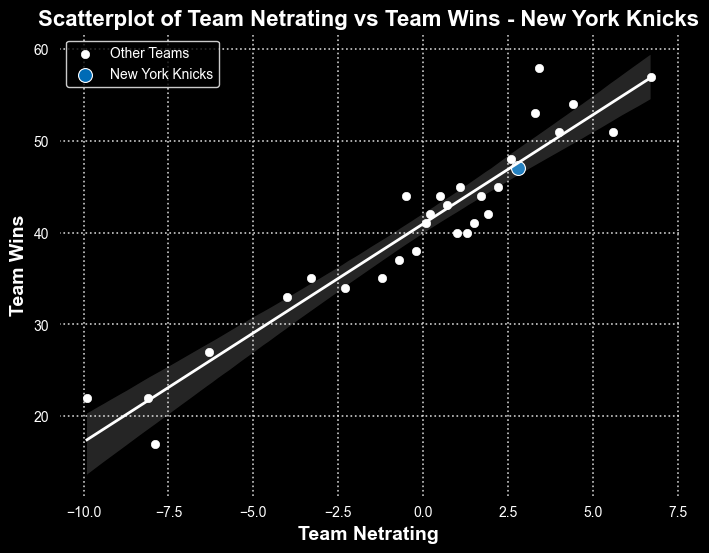

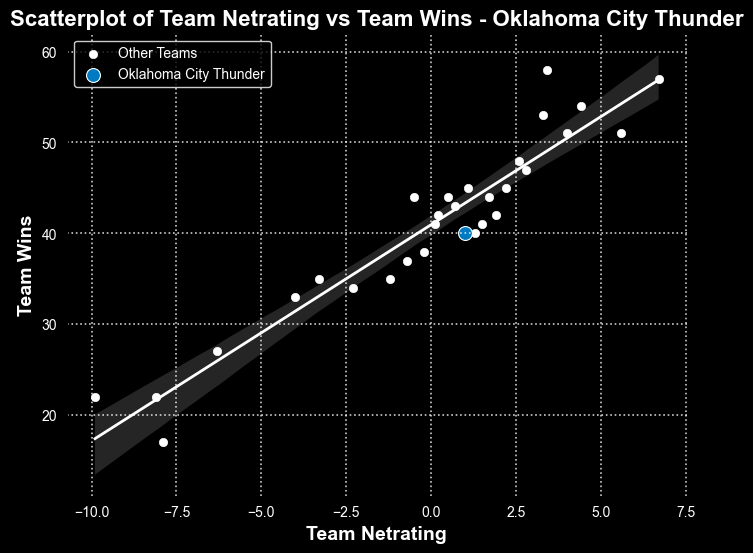

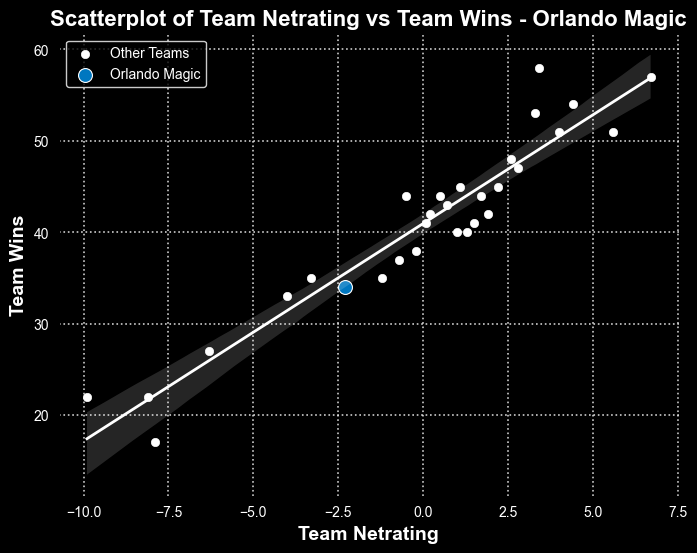

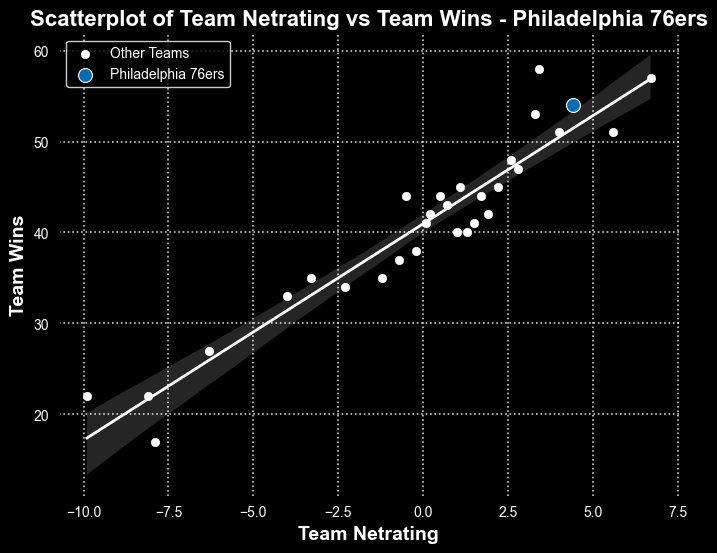

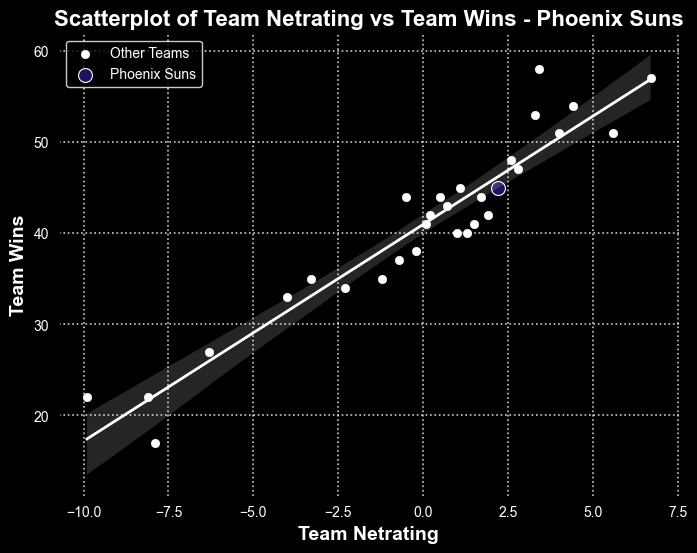

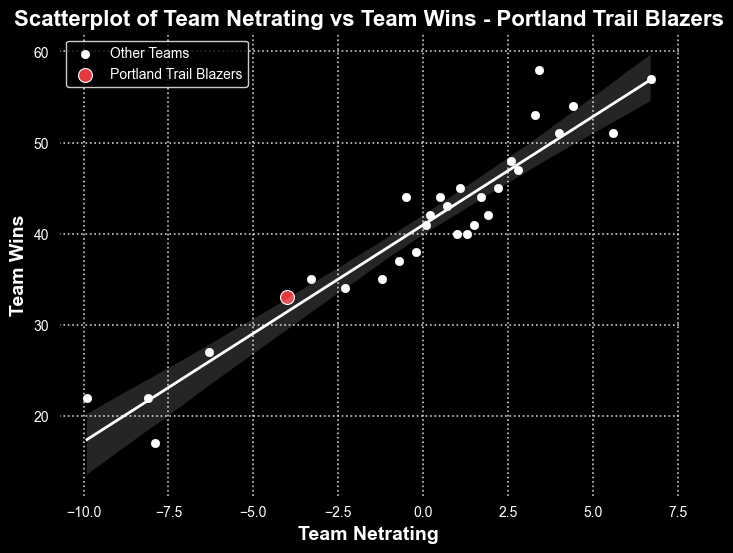

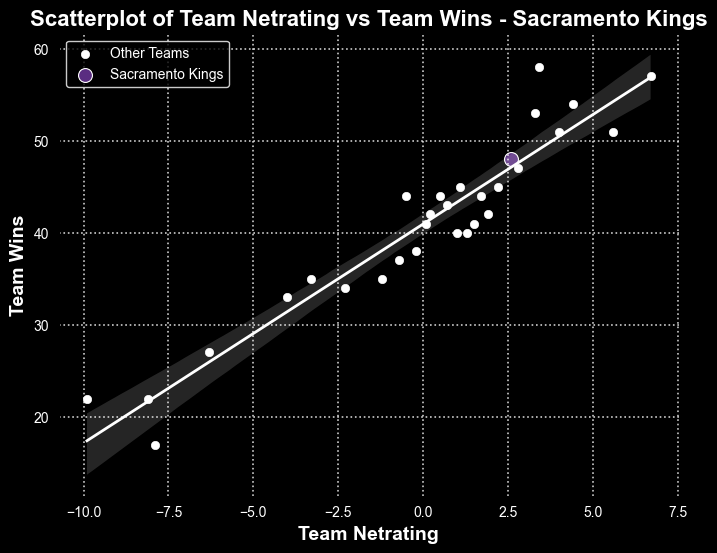

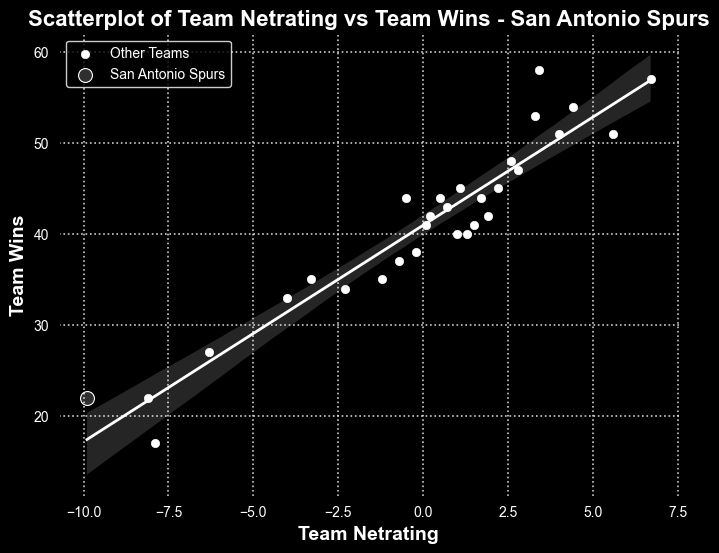

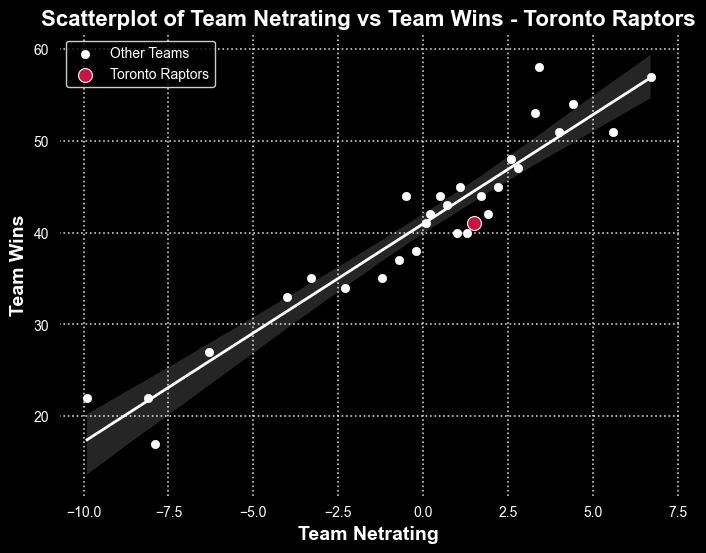

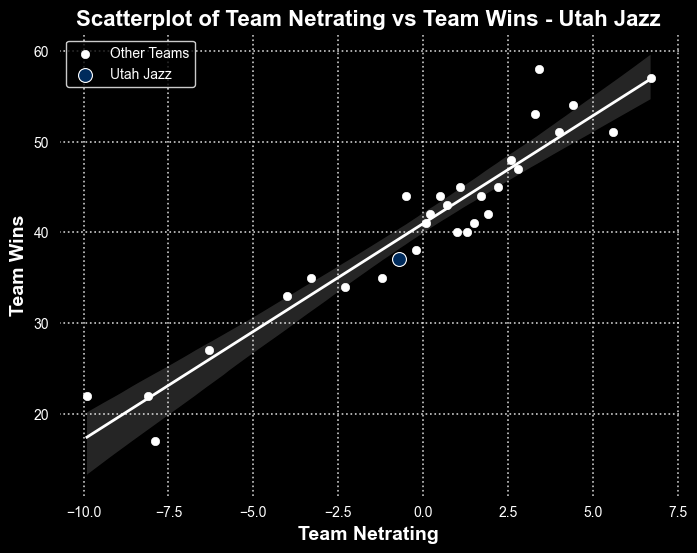

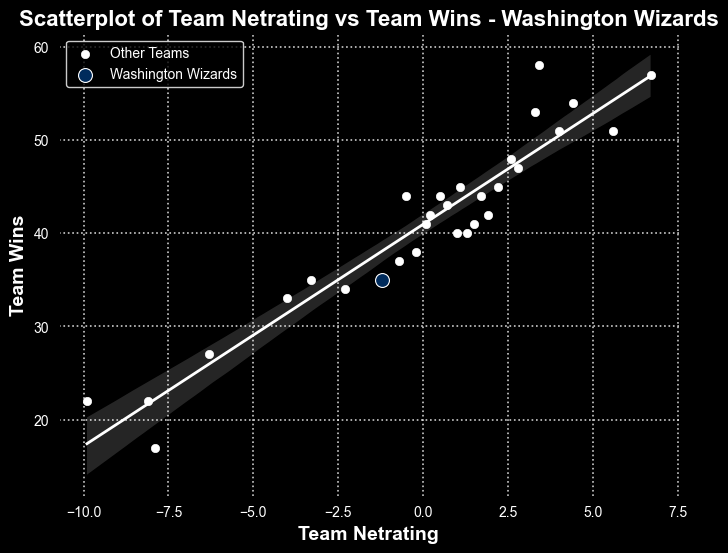

In [46]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


excel_file_path = r"C:\Users\Vasav\Downloads\NETRATINGREAL.xlsx"
player_team_data = pd.read_excel(excel_file_path)

# Display columns to check the correct column name
print("Columns in the DataFrame:", player_team_data.columns)

# Select relevant columns
netrating_column = 'NetRtg'
team_wins_column = 'W'
team_name_column = 'TEAM'

# Check if the columns exist
if team_name_column not in player_team_data.columns:
    print(f"Column '{team_name_column}' not found. Please check the actual column names.")
else:
    # Drop missing values
    player_team_data = player_team_data.dropna(subset=[netrating_column, team_wins_column])

    player_team_data[netrating_column] = pd.to_numeric(player_team_data[netrating_column], errors='coerce')
    player_team_data[team_wins_column] = pd.to_numeric(player_team_data[team_wins_column], errors='coerce')

team_colors = {
    'Atlanta Hawks': '#E03A3E',       # Red
    'Boston Celtics': '#007A33',      # Green
    'Brooklyn Nets': '#000000',       # Black
    'Charlotte Hornets': '#1D1160',   # Purple
    'Chicago Bulls': '#CE1141',       # Red
    'Cleveland Cavaliers': '#860038', # Wine
    'Dallas Mavericks': '#00538C',    # Blue
    'Denver Nuggets': '#0E2240',      # Navy
    'Detroit Pistons': '#C8102E',     # Red
    'Golden State Warriors': '#1D428A', # Blue
    'Houston Rockets': '#CE1141',     # Red
    'Indiana Pacers': '#002D62',      # Navy
    'Los Angeles Clippers': '#6E6E6E', # Red
    'Los Angeles Lakers': '#552583',  # Purple
    'Memphis Grizzlies': '#5D76A9',   # Blue
    'Miami Heat': '#98002E',          # Red
    'Milwaukee Bucks': '#00471B',     # Green
    'Minnesota Timberwolves': '#0C2340', # Navy
    'New Orleans Pelicans': '#0C2340', # Navy
    'New York Knicks': '#006BB6',     # Blue
    'Oklahoma City Thunder': '#007AC1', # Blue
    'Orlando Magic': '#0077C0',       # Blue
    'Philadelphia 76ers': '#006BB6',  # Blue
    'Phoenix Suns': '#1D1160',        # Purple
    'Portland Trail Blazers': '#E03A3E', # Red
    'Sacramento Kings': '#5A2D81',    # Purple
    'San Antonio Spurs': '#2F2F2F',   # Silver
    'Toronto Raptors': '#CE1141',     # Red
    'Utah Jazz': '#002B5C',           # Navy
    'Washington Wizards': '#002B5C'   # Navy
}
    
unique_teams = player_team_data[team_name_column].unique()


plt.rcParams["font.family"] = "Arial"


for team in unique_teams:

    team_data = player_team_data[player_team_data[team_name_column] == team]

    highlight_color = team_colors.get(team, 'white')

    plt.figure(figsize=(8, 6), facecolor='black')
    ax = plt.gca()
    ax.set_facecolor('black')

    sns.scatterplot(x=netrating_column, y=team_wins_column, data=player_team_data, label='Other Teams', color='white', ax=ax)

    sns.scatterplot(x=team_data[netrating_column], y=team_data[team_wins_column], color=highlight_color, s=100, label=team, ax=ax)

    sns.regplot(x=netrating_column, y=team_wins_column, data=player_team_data, scatter=False, color='white', line_kws={"linewidth": 2}, ax=ax)

    plt.title(f"Scatterplot of Team Netrating vs Team Wins - {team}", fontsize=16, fontweight='bold', color='white')
    plt.xlabel("Team Netrating", fontsize=14, fontweight='bold', color='white')
    plt.ylabel("Team Wins", fontsize=14, fontweight='bold', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.legend(facecolor='black', edgecolor='white', labelcolor='white')

    plt.grid(color='white', linestyle=':', linewidth=1.2, alpha=0.8)

    plt.show()


